In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

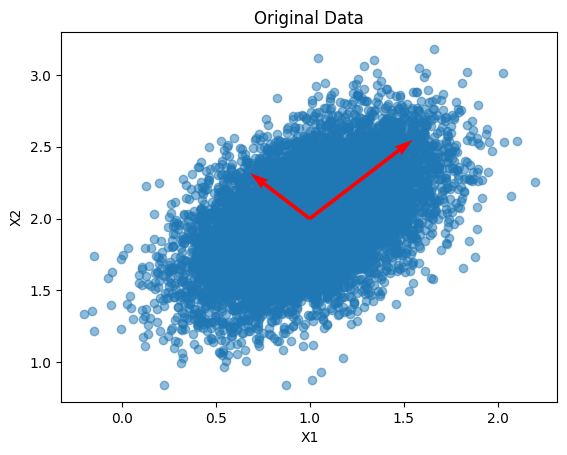

In [2]:
# Directional Variance Calculation:
# Write code to compute directional variance along an arbitrary query vector using a data matrix. Generate a 2D
# Gaussian scatter plot, calculate directional variances along multiple directions, and interpret the results using the covariance matrix.

mean1 = (1, 2)
cov1 = [[0.1, 0.05], [0.05, 0.1]]

rng = np.random.default_rng()
x = rng.multivariate_normal(mean1, cov1, size=10000)
x1, x2 = x[:, 0], x[:, 1]

plt.scatter(x1, x2, alpha=0.5)
plt.title("Original Data")

e_values, e_vec = np.linalg.eig(cov1)

for i in range(len(e_vec)):
    e_vector = e_vec[:, i]
    e_scaled = e_vector * np.sqrt(e_values[i]) * 2  # Scale for visualization

    plt.quiver(1, 2, e_scaled[0], e_scaled[1], angles='xy', scale_units='xy', scale=1, color='red')


plt.xlabel("X1")
plt.ylabel("X2")
plt.show()



In [3]:
#prove that V^tAV has max value when v-eigen vector with largest |eigen val|

np.random.seed(0)

A=[[2,4],[4,2]]

eigenvalues, eigenvectors = np.linalg.eigh(A)

max_index = np.argmax(np.abs(eigenvalues))  # Index of max absolute eigenvalue
V_max = eigenvectors[:, max_index]

#V^T A V
max_value = V_max.T @ A @ V_max

print(max_value)

# random unit vectors
random_V = np.random.randn(2)
random_V /= np.linalg.norm(random_V)  # Normalize to unit length
random_value = random_V.T @ A @ random_V

print(random_value)


5.999999999999999
3.7259092082913896


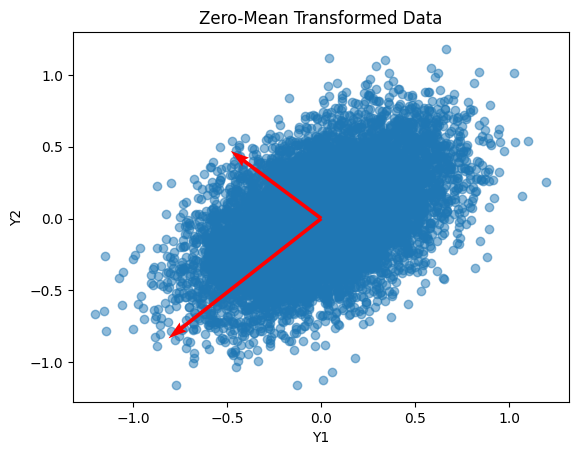

In [4]:
#Zero-mean Transformation:
#Compare directional variances before and after zero-mean transformation to understand the importance of centering the data.

# Zero-mean transformation
y = x - np.mean(x, axis=0)

# Extract zero-mean transformed values
y1, y2 = y[:, 0], y[:, 1]

plt.scatter(y1, y2, alpha=0.5)
plt.title("Zero-Mean Transformed Data")


cov_y = np.cov(y.T)
e_vals, e_vecs = np.linalg.eig(cov_y)


for i in range(len(e_vecs)):
    e_vect = e_vecs[:, i]
    e_yscaled = e_vect * np.sqrt(e_vals[i]) * 3

    plt.quiver(0, 0, e_yscaled[0], e_yscaled[1], angles='xy', scale_units='xy', scale=1, color='red')

plt.xlabel("Y1")
plt.ylabel("Y2")
plt.show()

